# 자료관리와 통계분석

분석할 자료가 정리되어 CSV 파일에 저장되어 있는 상황에서 강의를 진행한다.
현실에서는 자료가 데이터베이스에 들어 있거나 다른 형식의 파일로 저장되어 있을 수 있다.

# 자료와 CSV 파일

자료를 저장/공유하는 방법 중 하나는 CSV(comma separated values) 파일이다.
앞에서 소개한 Kaggle, DrivenData와 같은 사이트에서 제공하는 자료도 대부분 CSV 파일이다.
일반적으로 자료는 2차원 표로 개념화할 수 있는데, CSV 파일은 표의 행(row)을 줄(line)로 대응시킨 텍스트 파일이다.
그리고 특정 행의 여러 값은 동일한 줄에 쉼표(빈칸 또는 탭)로 구분하여 기재한다.

CSV 파일이 텍스트 파일이므로 메모장과 같은 편집기(editor)만 있으면 자료를 입력한 CSV 파일을 만들 수 있다.
가장 편리한 방법은 Excel과 같은 spreadsheet 프로그램을 사용하여 자료를 입력/수정한 다음 CSV 형식으로 저장하는 것이다.

## CSV 파일 읽기

CSV 파일에 저장된 자료를 분석할 때는 이 자료를 읽어 2차원 표를 개념화한 `pandas` 패키지의 `DataFrame` 객체로 만드는 것으로 시작하는 것이 좋다.
`DataFrame` 객체로 만들면 기본적인 기술통계분석은 `DataFrame` 객체의 메소드로 수행할 수 있을 뿐 아니라 기계학습(machine learning)이나 심층학습(deep learning) 라이브러리와 바로 연동할 수 있다.

CSV 파일을 읽어 `DataFrame` 객체를 만들 때는 `pandas` 패키지의 `read_csv()` 함수를 사용한다.
`read_csv()` 함수를 호출할 때도 `sep`, `header` 매개변수에 **쉼표가 아닌 값 구분문자**, **열 이름 여부**를 전달할 수 있다.

패키지를 사용하려면 먼저 패키지를 `import`해야 한다.
`pandas`는 다음과 같이 `import`하는 것이 관례이다.
`as` 다음은 패키지에 대한 **별명**(alias)이다.
패키지에 별명을 붙이지 않아도 되지만 그러면 패키지 이름을 사용해서 프로그램해야 한다.

In [1]:
import pandas as pd

In [2]:
import pandas as pd
meta = pd.read_csv('./datasets/metabolism.csv')
# metabolism_data_from_tsv_with_header = pd.read_csv('metabolism.csv',
#                                                    sep='\t', header=None)

### 연습문제

1. `datasets` 하위 디렉토리에 `sample.csv`, `wine.csv`가 있다. Excel로 이 파일을 열어서 파일의 구조를 알아본다음 `DataFrame` 객체로 읽어들이시오. `DataFrame` 객체 이름은 각각 `voters`, `wine`로 하시오.

## 객체의 속성과 메소드

일반적으로 객체는 자료와 함께 이 자료를 처리하는 기능도 가지고 있다.
따라서 `DataFrame` 객체는 자신이 저장하고 있는 자료와 자료에 대한 정보 그리고 자료를 처리(분석)하는 기본적인 기능을 가지고 있다.
이는 자료에 대한 정보를 추출해주거나 자료를 분석하는 함수를 별도로 만들거나 검색하지 않아도 된다는 것을 의미한다.
따라서 일단 자료가 `DataFrame` 객체로 만들어지면 후속 작업은 상당히 간편해진다.
(이 점이 R과 다른 점이다.)

객체가 하는 일(계산, 연산)은 객체에 부속된 함수로 구현되는데 이를 **메소드(method)**라고 한다.
객체가 보유하고 있는 정보는 객체에 부속된 변수에 저장되는데 이를 **속성(attribute)**이라고 한다.
따라서 객체로 하여금 어떤 일을 하게 하려면 객체의 메소드를 호출하면 되고, 객체의 정보를 보려면 객체의 속성을 조회하면 된다.

`DataFrame` 객체가 가지고 있는 속성과 메소드는 다음과 같이 알아볼 수 있다.
이름이 밑줄 `_`로 시작하는 속성이나 메소드는 private member이므로 이름이 밑줄로 시작하지 않는 public member에 집중하면 된다.

In [3]:
print(', '.join(dir(meta)))

T, _AXIS_ALIASES, _AXIS_IALIASES, _AXIS_LEN, _AXIS_NAMES, _AXIS_NUMBERS, _AXIS_ORDERS, _AXIS_REVERSED, _AXIS_SLICEMAP, __abs__, __add__, __and__, __array__, __array_wrap__, __bool__, __bytes__, __class__, __contains__, __copy__, __deepcopy__, __delattr__, __delitem__, __dict__, __dir__, __div__, __doc__, __eq__, __finalize__, __floordiv__, __format__, __ge__, __getattr__, __getattribute__, __getitem__, __getstate__, __gt__, __hash__, __iadd__, __imul__, __init__, __init_subclass__, __invert__, __ipow__, __isub__, __iter__, __itruediv__, __le__, __len__, __lt__, __mod__, __module__, __mul__, __ne__, __neg__, __new__, __nonzero__, __or__, __pow__, __radd__, __rand__, __rdiv__, __reduce__, __reduce_ex__, __repr__, __rfloordiv__, __rmod__, __rmul__, __ror__, __round__, __rpow__, __rsub__, __rtruediv__, __rxor__, __setattr__, __setitem__, __setstate__, __sizeof__, __str__, __sub__, __subclasshook__, __truediv__, __unicode__, __weakref__, __xor__, _accessors, _add_numeric_operations, _add_se

`DataFrame` 객체에 저장된 자료에 대한 전반적인 정보는 `info()` 메소드로 알아볼 수 있다.

In [4]:
meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 3 columns):
gender    19 non-null object
rate      19 non-null int64
weight    19 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 536.0+ bytes


### 연습문제

1. `DataFrame` 객체 `voters`, `wine`에 저장된 자료에 대한 전반적인 정보를 확인하시오.

## 열 이름의 조회와 수정

`DataFrame` 객체에 저장된 자료의 열 이름(변수 이름)을 보려면 `columns` 속성을 조회한다.
`columns` 속성의 값을 변경하면 열 이름을 변경할 수 있다.

열을 통계학에서는 변수, 기계학습이나 심층학습에서는 `feature`라고 한다.
앞으로 이 용어들은 동의어로 사용하기로 하겠다.

In [5]:
print(meta.columns)

Index(['gender', 'rate', 'weight'], dtype='object')


In [6]:
old_names = meta.columns
meta.columns = ['var1', 'var2', 'var3']
print(meta.columns)
meta.columns = old_names
print(meta.columns)

Index(['var1', 'var2', 'var3'], dtype='object')
Index(['gender', 'rate', 'weight'], dtype='object')


### 연습문제

1. `DataFrame` 객체 `voters`, `wine`에 저장된 자료의 변수 이름을 알아보시오.

## 열 이름으로 특정 열 추출

열 이름을 사용하면 자료에서 특정 열만 추출할 수 있다.
열 이름으로 특정 열을 추출할 때도 객체의 속성을 알아볼 때와 같이 `DataFrame` 객체 이름 다음에 마침표를 찍고 이어서 열 이름을 기재한다.
열 이름에 빈 칸이 포함되어 있을 때는 이 방법을 사용하기 어렵기 때문에 아래에 소개할 `[]` 연산자를 사용한다.

In [7]:
print(meta.gender)

0     M
1     M
2     F
3     F
4     F
5     F
6     M
7     F
8     F
9     M
10    F
11    F
12    M
13    F
14    F
15    F
16    F
17    M
18    M
Name: gender, dtype: object


### 연습문제

1. 열 이름을 이용하여 `DataFrame` 객체 `voters`와 `wine`의 특정한 열만 추출해보시오.

## 행과 열의 수 조회

`DataFrame` 객체의 행과 열의 수를 알아보려면 `shape` 속성을 조회한다.
이 속성에는 행과 열의 수 두 값이 (행의 수, 열의 수)와 같이 `()`로 감싸져 저장되어 있는데, 이것은 `shape` 속성이 순서쌍에 해당하는 튜플(tuple) 자료형임을 나타낸다.
`[]` 연산자를 사용해서 튜플 객체에 저장된 값에 접근할 수 있다.
`[]` 연산자에는 접근하고자 하는 값의 위치를 나타내는 인덱스(index)를 기재한다.
인덱스는 0부터 시작한다.

In [8]:
meta.shape

(19, 3)

In [9]:
nrow = meta.shape[0]
ncol = meta.shape[1]
print(nrow, ncol)

19 3


### 연습문제

1. `DataFrame` 객체 `voters`와 `wine`의 행과 열의 수를 알아보시오.

## 결측치가 아닌 값의 수 조회

각 열에서 **결측치**(missing value)가 아닌 값의 수를 알고 싶으면 `DataFrame` 객체의 `count()` 메소드를 호출하면 된다.
결측치는 기본적으로 `None`로 표시하는데 `count()` 메소드는 `None`이 아닌 값의 개수를 계산해준다.

In [10]:
meta.count()

gender    19
rate      19
weight    19
dtype: int64

특정 열에서 결측치가 아닌 값의 개수는 다음과 같이 알아볼 수 있다.

In [11]:
meta.gender.count()

19

### 연습문제

1. `DataFrame` 객체 `voters`, `wine`에 결측치가 있는지 알아보시오.

## 부분적인 자료 조회

`DataFrame` 객체에 저장된 자료의 규모가 크면 자료를 출력하는 것도 상당히 시간이 걸린다.
따라서 `DataFrame` 객체에 저장된 자료의 일부분만 보는 방법이 필요하다.
`DataFrame` 객체의 `head()` 메소드와 `tail()` 메소드는 저장된 자료의 첫 몇 행과 마지막 몇 행만 출력해주는 메소드이다.
이 두 메소드를 호출할 때는 출력하고자 하는 행의 수를 인자로 줄 수 있다.

In [12]:
print(meta.head(3))

  gender  rate  weight
0      M  1792    62.0
1      M  1666    62.9
2      F   995    36.1


In [13]:
print(meta.tail(5))

   gender  rate  weight
14      F  1052    34.5
15      F  1347    51.1
16      F  1204    41.2
17      M  1867    51.9
18      M  1439    46.9


다음은 특정 열 첫 5개의 값를 출력하는 예이다.

In [14]:
meta.gender.head(5)

0    M
1    M
2    F
3    F
4    F
Name: gender, dtype: object

### 연습문제

1. `DataFrame` 객체 `voter`, `wine`의 앞부분과 뒷부분 자료를 조회해보시오.

## 여러 열을 추출

`DataFrame` 객체에서 특정 열을 추출하는 또 다른 방법은 `[]` 연산자에 추출하고자 하는 열 이름을 문자열로 주는 것이다. 
여러 개의 열을 추출할 때는 이 방법을 사용해야 하며, 추출하고자 하는 열의 이름을 `[]`에 감싸서 `[]` 연산자에 인자로 전달해야 한다.
추출한 결과도 `DataFrame` 객체이며 다른 이름으로 저장할 수도 있다.

In [15]:
print(meta['weight'].head(5))
print(meta[['rate', 'gender']].head())

0    62.0
1    62.9
2    36.1
3    54.6
4    48.5
Name: weight, dtype: float64
   rate gender
0  1792      M
1  1666      M
2   995      F
3  1425      F
4  1396      F


In [16]:
meta_gender = meta[['rate', 'gender']]
print(meta_gender.info())
print(meta_gender.shape)
print(meta_gender.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 2 columns):
rate      19 non-null int64
gender    19 non-null object
dtypes: int64(1), object(1)
memory usage: 384.0+ bytes
None
(19, 2)
Index(['rate', 'gender'], dtype='object')


### 연습문제

1. `DataFrame` 객체 `voters`, `wine`의 각 열을 추출하여 `DataFrame` 객체로 저장해보시오.

## 자료의 조회와 수정

`DataFrame` 객체의 `values` 속성을 이용하면 자료 전체를 `numpy`에서 정의한 배열 `ndarray` 자료형으로 접근할 수 있다.
`ndarray` 자료형은 내부적으로 배열을 `list` 객체를 값으로 갖는 `list` 객체로 나타낸다.
이때 내부의 `list` 객체는 행을 나타낸다.
`list` 객체에 저장된 값은 `[]` 연산자로 접근할 수 있으므로 `[]` 연산자를 이중으로 사용하면 배열의 원소에 접근할 수 있다.
첫 번째 `[]` 연산자에는 행 번호를 두 번째 `[]` 연산자에는 열 번호를 주면 된다.

대부분의 기계학습, 심층학습 라이브러리들은 `numpy`를 기반으로 하고 있고, 때로는 `DataFrame` 객체가 아닌 `ndarray` 객체로 자료를 주어야 한다.
이때 `DataFrame` 객체의 `values` 속성을 사용하면 된다.

In [17]:
print(meta.values)
print(type(meta.values))
meta.values[0][2]

[['M' 1792 62.0]
 ['M' 1666 62.9]
 ['F' 995 36.1]
 ['F' 1425 54.6]
 ['F' 1396 48.5]
 ['F' 1418 42.0]
 ['M' 1362 47.4]
 ['F' 1502 50.6]
 ['F' 1256 42.0]
 ['M' 1614 48.7]
 ['F' 1189 40.3]
 ['F' 913 33.1]
 ['M' 1460 51.9]
 ['F' 1124 42.4]
 ['F' 1052 34.5]
 ['F' 1347 51.1]
 ['F' 1204 41.2]
 ['M' 1867 51.9]
 ['M' 1439 46.9]]
<class 'numpy.ndarray'>


62.0

### 연습문제

1. `DataFrame` 객체 `voters`, `wine` 객체의 `values` 속성으로 두 번째 변수의 10번째 값을 조회해보시오.

`DataFrame` 객체의 `values`을 이용하는 것보다 `iloc[]` 메소드를 사용하는 것이 더 편리할 때가 있다.
`iloc[]` 메소드를 호출할 때는 접근하고자 하는 행과 열의 번호를 인자로 준다.

여러 개의 행과 열을 지정할 때는 **슬라이싱(slicing)**이란 기법을 사용할 수 있다.
인덱스를 `start:stop` 또는 `start:stop:step`와 같은 형식으로 지정하는 것을 슬라이싱이라 한다.
`start:stop`은 `start`에서 시작해서 1씩 증가하지만 `stop`보다는 작은 일련의 인덱스를 나타내고, `start:stop:step`은 `start`에서 시작해서 `step`만큼씩 증가시키지만 `stop`을 초과하지 않는 일련의 인덱스를 나타낸다.
슬라이싱에서 `start`를 생략하면`strat`는 0이 되고, `stop`을 생략하면 `stop`은 열이나 행의 수가 되고, `step`을 생략하면 `step`은 1이 된다.

In [18]:
print(meta.iloc[0,2])
print(meta.iloc[0:2, 2])
print(meta.iloc[0:3, 0:2])
print(meta.iloc[:2, 1:])
print(meta.iloc[::3, 2])

62.0
0    62.0
1    62.9
Name: weight, dtype: float64
  gender  rate
0      M  1792
1      M  1666
2      F   995
   rate  weight
0  1792    62.0
1  1666    62.9
0     62.0
3     54.6
6     47.4
9     48.7
12    51.9
15    51.1
18    46.9
Name: weight, dtype: float64


### 연습문제

1. `DataFrame` 객체 `voters`, `wine`에서 첫 두 변수와 마지막 5행에 해당하는 자료를 추출해보시오.

`DataFrame` 객체의 `iloc[]` 메소드를 사용하여 값을 수정할 수도 있다.

In [19]:
meta_cp = meta.copy() # 복사본을 만들 때 copy() 메소드를 사용한다.
print(meta_cp.iloc[2, 2])
meta_cp.iloc[2, 2] = 30.0
print(meta_cp.iloc[2, 2])
meta_cp.iloc[2, 2] = 36.1
print(meta_cp.iloc[2, 2])

36.1
30.0
36.1


`DataFrame` 객체에 저장된 자료에 접근하거나 수정하는 메소드로 `at[]`가 있다.
`iloc[]`와 다른 점은 `at[]`는 행 번호와 열 이름을 인자로 해서 호출한다는 것이다.

In [20]:
print(meta_cp.at[0, 'weight'])

62.0


In [21]:
meta_cp.at[0, 'weight'] = 45.4
print(meta_cp.at[0, 'weight'])

45.4


## 열의 추가와 삭제

자료를 분석하면서 기존 변수를 이용하여 새로운 변수를 만들어 내야 할 경우가 있다.
기계학습이나 심층학습에서는 이를 **feature engineering**이라고 한다.
새로 생성된 변수도 기존 자료에 추가해야 분석 작업을 손쉽게 할 수 있다.

난수를 발생하여 가상 자료를 만들어 실습하기로 하자.
난수를 발생하는 여러 가지 함수는 `numpy` 라이브러리의 `random` 모듈에 정의되어 있다.
그 중에서 `randn()` 함수는 표준정규분포의 난수를 발생하는 함수인데 원하는 난수의 개수를 인자로 호출하면 된다.

In [22]:
import numpy as np
np.random.randn(10)

array([-0.41699124,  0.85306693,  0.18760644,  0.36330015, -0.56247719,
        1.04697391,  0.52398518, -0.25732624,  0.03157885, -1.74172999])

`DataFrame` 객체에 열을 추가하거나 제거할 수 있다.
`DataFrame` 객체에 추가할 새로운 열은 기존 열과 동일한 개수의 값을 가져야 한다.
`DataFrame` 객체에 새로운 열을 추가하려면 `[]` 연산자에 추가할 열의 이름을 주고 새로운 자료를 대입하면 된다.

In [23]:
new_var = np.random.randn(meta.shape[0])
print(new_var)

[-0.97444324  0.80119625 -0.60720041  0.52609149 -1.5283224   1.64421367
  0.02953224 -0.33090482 -2.41293077 -0.08442915  0.48333798  0.93768459
  1.96001171  0.33158398 -1.70553767 -1.23151465  1.09414872  1.19864414
 -0.14165112]


In [24]:
meta['new_var'] = new_var
print(meta.head())

  gender  rate  weight   new_var
0      M  1792    62.0 -0.974443
1      M  1666    62.9  0.801196
2      F   995    36.1 -0.607200
3      F  1425    54.6  0.526091
4      F  1396    48.5 -1.528322


`DataFrame` 객체에서 특정 열을 삭제할 때는 다음과 같이 `del` 문장을 사용한다.

In [25]:
del meta['new_var']
print(meta.head())

  gender  rate  weight
0      M  1792    62.0
1      M  1666    62.9
2      F   995    36.1
3      F  1425    54.6
4      F  1396    48.5


### 연습문제

1. $N \left( 100, 15^2 \right)$에서 적절한 개수의 난수를 발생하여 `DataFrame` 객체 `voters`, `wine`에 열로 추가해보시오.

## 척도의 지정

컴퓨터로 자료를 처리할 때 입력한 자료로 어떤 계산 또는 연산을 할 수 있는가를 지정하면 예기치 않는 오류를 방지할 수 있다.
변수의 **척도(scale)**는 그 변수를 측정한 값으로 어떤 계산이나 연산을 할 수 있는지 나타내는 개념이다.
프로그래밍 언어에서도 이와 유사한 개념으로 **자료형**(data type)이 있다.
파이썬에는 수치와 관련한 자료형으로 `int`, `float` 두 가지가 있다.
하지만 통계학에서는 수치를 4가지 척도 **명목척도**(nominal scale), **순서척도**(ordinal scale), **구간척도**(interval scale), **비척도**(ratio scale)로 구분하므로 현재 프로그래밍 언어가 이를 다 구현하고 있지 않는 실정이다.
따라서 올바른 자료분석을 위해서 척도를 지정하는 추가적인 조치를 해야만 한다.
`pandas` 패키지에 척도를 위한 조치가 구현되어 있지만 구간척도를 지정하는 방법은 없으므로 자료를 분석하는 사람은 구간척도를 갖는 변수에 대해서는 특히 조심해야 한다.

대부분의 프로그래밍 언어는 기본적으로 수치를 비척도로 간주하므로 변수 별로 **범주형 변수(categorical variable, 명목척도나 순서척도를 갖는 변수)** 여부를 지정해야 한다.
이를 위해 `pandas` 패키지는 `Categorical()` 함수를 정의하고 있다.
`Categorical()` 함수를 호출할 때 자료를 인자로 전달한다.
그리고 `categories` 매개변수에는 범주형 변수가 가질 수 있는 값의 목록을 전달하고, `ordered` 매개변수에는 순서척도 여부를 `True` 또는 `False`로 지정한다.
`ordered` 매개변수에 `True`를 전달하면 순서척도임을 지정하는 것이며 값의 순서는 `categories` 매개변수에 전달한 값의 순서와 같다.

한 가지 주의할 점은 `Categorical()` 함수는 원자료의 척도를 변경하지 않고 척도가 변경된 새로운 자료를 만들어 주므로 `Categoricale()` 함수가 반환하는 결과를 저장해야 한다.

**대사율자료**에서 변수 `gender`의 척도는 명목척도이다.
따라서 **대사율자료** 의 `gender` 열의 척도는 다음과 지정할 수 있다.

In [26]:
print(meta.info())
meta.gender = pd.Categorical(meta.gender, categories=['M', 'F'], ordered=False)
meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 3 columns):
gender    19 non-null object
rate      19 non-null int64
weight    19 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 536.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 3 columns):
gender    19 non-null category
rate      19 non-null int64
weight    19 non-null float64
dtypes: category(1), float64(1), int64(1)
memory usage: 499.0 bytes


In [27]:
print(meta.gender.head())

0    M
1    M
2    F
3    F
4    F
Name: gender, dtype: category
Categories (2, object): [M, F]


### 연습문제

1. `DataFrame` 객체 `voters`, `wine`에서 각 변수의 척도에 적합한 처리를 수행하시오.

## `DataFrame` 객체의 저장

`DataFrame` 객체에 저장된 자료는 여러 가지 방법으로 저장할 수 있지만 여기서는 CSV 파일로 저장하는 방법만 다루기로 하자.
파일 이름을 인자로 해서 `DataFrame` 객체의 `to_csv()` 메소드를 호출하면 CSV 파일로 저장할 수 있다.
`to_csv()` 메소드는 기본적으로 행 번호와 열 이름도 파일에 저장해준다.
행 번호는 출력하지 않는 것이 좋으며 이때는 `to_csv()` 메소드의 `index` 매개변수에 `False`를 인자로 전달하면 된다.

Note: `DataFrame` 객체는 여러 타입의 파일로 저장하는`to_`로 시작하는 메소드를 가지고 있다. 파일로부터 `DataFrame` 객체를 생성할 때는 `pandas.read_csv()` 함수와 같은 `read_`로 시작하는 함수를 사용한다.

In [28]:
meta.to_csv('metabolism_post.csv', index=False)

`to_csv()` 메소드를 호출할 때 쉼표 대신 사용할 값 구분문자, 열 이름의 출력 여부 등도 지정할 수 있다.
값 구분문자는 `sep` 매개변수에 전달하고, 열 이름의 출력 여부는 `header` 매개변수에 논리값으로 전달한다.
`DataFrame` 객체의 일부 열만 출력하도록 지정할 수도 있는데 `columns` 매개변수에 출력할 열 이름을 리스트로 전달하면 된다.

In [29]:
meta.to_csv('gender_rate.csv', columns=['gender', 'rate'], sep='\t', header=False, index=False)

## 통계분석

`DataFrame` 자료구조는 자료분석에 필요한 기본적인 메소드를 가지고 있다.
다음은 이 메소드를 이용해서 특정 열의 최대값, 최소값, 평균, 중앙값, 첨도, 비대칭도(왜도), 분산, 표준편차, 평균편차, 분위수를 구하는 예이다.

In [30]:
print(meta.rate.max())
print(meta.rate.min())
print(meta.rate.mean())
print(meta.rate.median())
print(meta.rate.kurt())
print(meta.rate.skew())
print(meta.rate.var())
print(meta.rate.std())
print(meta.rate.mad())
qct = [0.1, 0.2, 0.3, 0.4, 0.5]
print(meta.rate.quantile(qct))

1867
913
1369.5263157894738
1396.0
-0.330662640995
0.132742542277
66308.37426900584
257.50412476114985
198.2880886426593
0.1    1040.6
0.2    1163.0
0.3    1224.8
0.4    1350.0
0.5    1396.0
Name: rate, dtype: float64


다음은 특정 열의 합, 누적합을 구하고, 정렬한 결과를 구하는 예이다.

In [31]:
print(meta.rate.sum())
print(meta.rate.cumsum())
rate = meta.rate.sort_values()
print(rate)

26021
0      1792
1      3458
2      4453
3      5878
4      7274
5      8692
6     10054
7     11556
8     12812
9     14426
10    15615
11    16528
12    17988
13    19112
14    20164
15    21511
16    22715
17    24582
18    26021
Name: rate, dtype: int64
11     913
2      995
14    1052
13    1124
10    1189
16    1204
8     1256
15    1347
6     1362
4     1396
5     1418
3     1425
18    1439
12    1460
7     1502
9     1614
1     1666
0     1792
17    1867
Name: rate, dtype: int64


In [32]:
print(meta.max())
print(meta.min())
print(meta.mean())
print(meta.median())
print(meta.kurt())
print(meta.skew())
print(meta.var())
print(meta.std())
print(meta.mad())
qct = [0.1, 0.2, 0.3, 0.4, 0.5]
print(meta.quantile(qct))

gender       M
rate      1867
weight    62.9
dtype: object
gender       F
rate       913
weight    33.1
dtype: object
rate      1369.526316
weight      46.742105
dtype: float64
rate      1396.0
weight      47.4
dtype: float64
rate     -0.330663
weight   -0.242579
dtype: float64
rate      0.132743
weight    0.259038
dtype: float64
rate      66308.374269
weight       68.631462
dtype: float64
rate      257.504125
weight      8.284411
dtype: float64
rate      198.288089
weight      6.561773
dtype: float64
       rate  weight
0.1  1040.6   35.78
0.2  1163.0   40.84
0.3  1224.8   42.00
0.4  1350.0   43.30
0.5  1396.0   47.40


다음은 비척도를 갖는 열 간의 상관계수 행렬을 구하는 예이다.
범주형 변수로 지정된 열은 상관계수를 구할 수 없으므로 이 결과에 포함되지 않는다.
척도를 지정하는 것이 중요하다는 것을 보여주는 대표적인 예이다.

In [33]:
meta.corr()

,rate,weight
rate,1.000000,0.864736
weight,0.864736,1.000000


## 히스토그램 작성

`DataFrame` 객체의 `plot()` 메소드로 산점도, 히스토그램, 상자 그림, 꺽은 선 그래프, 원 그래프 등을 작성할 수 있다.
작성한 그래프를 jupyter notebook에 포함시키려면 다음 문장을 실행해야 한다.

In [34]:
%matplotlib inline

In [35]:
print(meta.rate.min())
meta.rate.max()

913


1867

Text(0,0.5,'density')

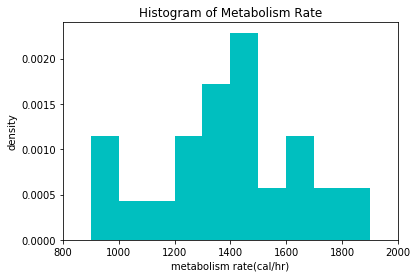

In [36]:
ax = meta.rate.plot(kind='hist', bins=[900, 1000, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000], 
               normed=True, 
               xlim=(800, 2000), # ylim=(a, b)
               color='c',
               title='Histogram of Metabolism Rate')
ax.set_xlabel('metabolism rate(cal/hr)')
ax.set_ylabel('density')

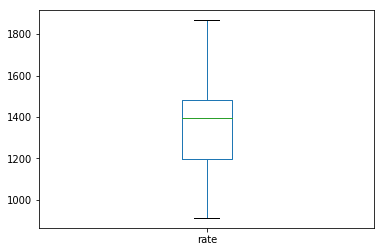

In [37]:
meta.rate.plot(kind='box')

`value_counts()` 메소드를 사용하면 범주형 변수의 도수분포표를 쉽게 작성할 수 있다.
이 결과를 이용해서 막대그래프를 작성할 수 있다.

F    0.631579
M    0.368421
Name: gender, dtype: float64


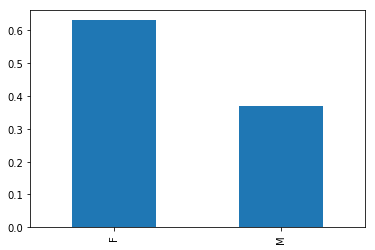

In [38]:
freq = meta.gender.value_counts()
relfreq = meta.gender.value_counts(normalize=True)
print(relfreq)
relfreq.plot(kind='bar')

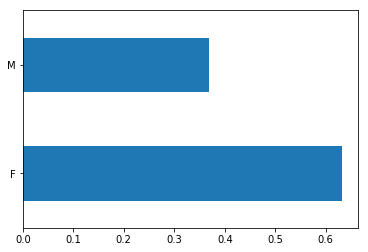

In [39]:
relfreq.plot(kind='barh')

비척도를 갖는 변수 간의 관계를 알아보기 위한 산점도도작성할 수 있다.

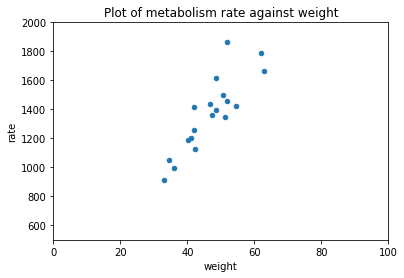

In [40]:
meta.plot(kind='scatter', x='weight', y='rate',
         xlim=(0, 100),
         ylim=(500, 2000),
         title="Plot of metabolism rate against weight")

## 집단별 분석

자료를 범주형 변수의 값에 따라 소집단으로 나누어 분석하려면 `groupby()` 메소드를 사용한다.
다음은 자료를 성별로 분석하는 예이다.

In [41]:
print(meta.groupby('gender').mean())
print(meta.groupby('gender').std())

               rate     weight
gender                        
M       1600.000000  53.100000
F       1235.083333  43.033333
              rate    weight
gender                      
M       189.239707  6.688547
F       188.282891  6.868417


In [42]:
meta.groupby('gender').rate.mean()

gender
M    1600.000000
F    1235.083333
Name: rate, dtype: float64

다음은 체중과 대사율 간의 관계를 보여주는 산점도를 성별로 작성하는 예이다.

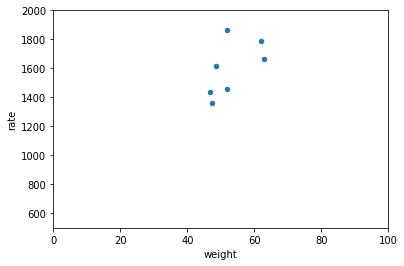

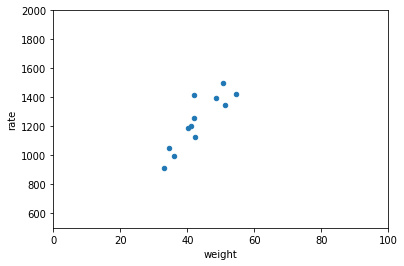

In [43]:
import matplotlib.pyplot as plt
#ax = plt.subplot()
subplots = meta.groupby('gender').plot(kind='scatter', x='weight', y='rate',
                            xlim=(0, 100), ylim=(500, 2000))

In [44]:
print(subplots)

gender
M    AxesSubplot(0.125,0.125;0.775x0.755)
F    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object


## 회귀분석

**회귀분석**(regression analysis)은 반응변수와 설명변수 간의 함수 관계를 찾아내고 추정하는 통계적 방법이다.
관계를 표현하는 함수는 선형일수도 비선형일 수도 있다.
전통적인 회귀분석 이론은 선형인 경우를 많이 다루지만 그렇다고 선형모형에만 적용하는 분석법은 아니다.

전통적인 회귀모형의 반응변수는 비척도를 갖는 양적변수이지만, 반응변수가 범주형 변수인 경우도 회귀분석 이론에 통합되었으며 **일반화 선형모형**(generalized linear model)이라고 한다.
대표적인 일반화 선형모형이 **로지스틱 회귀분석**(logistic regression analysis)이다.

머신 러닝이나 딥 러닝에서는 반응변수가 양적변수인 경우를 **회귀** 또는 **예측**(prediction)이라고 하고, 범주형 변수인 경우를 **분류(classification)**라고 한다.
이는 회귀분석 특히 비선형 회귀분석이 머신 러닝과 딥 러닝의 핵심임을 시사한다.

회귀분석과 같은 고급 통계분석 기법은 대부분 `statsmodels` 패키지에 구현되어 있다.
`statsmodels.formula.api` 모듈은 R과 동일한 방법으로 분석할 수 있도록 해준다.

`formula` 매개변수와 `data` 매개변수에 회귀모형과 `DataFrame` 객체를 전달하여 `ols()` 함수를 실행하면 회귀모형 객체를 생성할 수 있다.
회귀모형 객체의 `fit()` 메소드는 회귀분석을 실시하고 그 결과를 반환한다.
`summary()` 메소드를 비롯한 결과 객체의 메소드로 회귀분석 결과를 볼 수 있다.

회귀모형은 `반응변수 ~ 설명변수 + 설명변수 + ...`와 같은 방법으로 문자열로 지정한다.
반응변수와 설명변수는 `DataFrame` 객체에 저장된 자료의 열 이름이다.

In [45]:
from statsmodels.formula.api import ols
model = ols(formula='rate ~ weight', data=meta)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   rate   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     50.40
Date:                Mon, 29 Jan 2018   Prob (F-statistic):           1.78e-06
Time:                        15:05:08   Log-Likelihood:                -118.83
No. Observations:                  19   AIC:                             241.7
Df Residuals:                      17   BIC:                             243.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    113.1654    179.587      0.630      0.5

d:\app\Anaconda3\lib\site-packages\scipy\stats\stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


회귀분석 결과 객체의 속성과 메소드는 다음과 같이 알아 볼 수 있다.

In [46]:
print(', '.join(dir(result)))

HC0_se, HC1_se, HC2_se, HC3_se, _HCCM, __class__, __delattr__, __dict__, __dir__, __doc__, __eq__, __format__, __ge__, __getattribute__, __gt__, __hash__, __init__, __init_subclass__, __le__, __lt__, __module__, __ne__, __new__, __reduce__, __reduce_ex__, __repr__, __setattr__, __sizeof__, __str__, __subclasshook__, __weakref__, _cache, _data_attr, _get_robustcov_results, _is_nested, _wexog_singular_values, aic, bic, bse, centered_tss, compare_f_test, compare_lm_test, compare_lr_test, condition_number, conf_int, conf_int_el, cov_HC0, cov_HC1, cov_HC2, cov_HC3, cov_kwds, cov_params, cov_type, df_model, df_resid, diagn, eigenvals, el_test, ess, f_pvalue, f_test, fittedvalues, fvalue, get_influence, get_prediction, get_robustcov_results, initialize, k_constant, llf, load, model, mse_model, mse_resid, mse_total, nobs, normalized_cov_params, outlier_test, params, predict, pvalues, remove_data, resid, resid_pearson, rsquared, rsquared_adj, save, scale, ssr, summary, summary2, t_test, tvalues

In [47]:
print(result.params)
print(result.params[0])

Intercept    113.165407
weight        26.878569
dtype: float64
113.16540715


분산분석표에 들어갈 자유도는 `df_resid`, `df_model` 속성에 저장되어 있다.

In [48]:
print(result.df_resid)
print(result.df_model)

17.0
1.0


오차항의 추정치 MSE는 `mse_model` 속성에 저장되어 있다.

In [49]:
print(result.mse_model)

892499.634981


잔차는 `resid` 속성에 저장되어 있다.

In [50]:
print(result.resid)

0      12.363305
1    -137.827407
2     -88.481754
3    -155.735283
4     -20.776011
5     175.934688
6     -25.209585
7      28.778994
8      13.934688
9     191.848275
10     -7.371744
11    -89.846046
12    -48.163146
13   -128.816739
14     11.523957
15   -139.660291
16    -16.562456
17    358.836854
18     65.229700
dtype: float64


회귀분석 결과에 대한 분산분석표는 다음과 같이 출력할 수 있다.

In [51]:
import statsmodels.stats.anova as smsa
anova = smsa.anova_lm(result, typ=1)
print(anova)

            df         sum_sq        mean_sq        F    PR(>F)
weight     1.0  892499.634981  892499.634981  50.3984  0.000002
Residual  17.0  301051.101862   17708.888345      NaN       NaN


d:\app\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
d:\app\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
d:\app\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


분산분석 결과가 `DataFrame` 객체이므로 자료가 저장된 `DataFrame` 객체를 다룰 때와 같은 방법으로 이용할 수 있다. 

In [52]:
print(type(anova))
print(anova.columns)
print(anova.sum_sq)

<class 'pandas.core.frame.DataFrame'>
Index(['df', 'sum_sq', 'mean_sq', 'F', 'PR(>F)'], dtype='object')
weight      892499.634981
Residual    301051.101862
Name: sum_sq, dtype: float64


원자료에 잔차와 추정값을 추가한 `DataFrame` 객체를 만들어서 CSV 파일로 저장할 수 있으며, 추정된 회귀선과 산점도를 겹친 그래프를 그릴 수 있다.

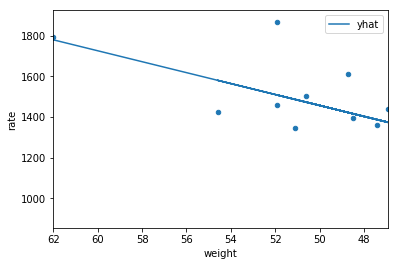

In [53]:
meta['residual'] = result.resid
meta['yhat'] = meta.rate - result.resid
ax = meta.plot(kind='line', x='weight', y='yhat')
meta.plot(kind='scatter', x='weight', y='rate', ax = ax)

In [54]:
meta.to_csv('meta_reg_result.csv', index=False)

## 범주형 설명변수가 있는 회귀모형의 분석

범주형 설명변수는 `C(범주형변수)`와 같은 방법으로 회귀모형에 포함시킨다.
그러면 범주형 변수는 0, 1을 값으로 갖는 **이진변수(binary variable, indicator variable)**로 자동변환되어 회귀분석이 실시된다.
머신 러닝이나 딥 러닝에서는 이런 변환을 **one hot encoding**이라고 한다.

`statsmodels` 패키지에서는 자동적으로 one hot encoding이 되도록 했지만, 머신 러닝과 딥 러닝에 사용되는 다른 파이썬 패키지에서는 one hot encoding을 지원하는 함수나 메소드로 one hot encoding을 수행한 다음 분석에 들어가야 한다.

회귀모형에 설명변수들의 효과만 포함시키고자 하면 설명변수 사이에 `+`를 기재하고, 설명변수 간의 **교호작용(상호작용, interaction)**도 포함시키고자 하면 변수 사이에 `*`를 기재한다.

In [55]:
model = ols(formula='rate ~ weight * C(gender)', data=meta)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   rate   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     20.95
Date:                Mon, 29 Jan 2018   Prob (F-statistic):           1.28e-05
Time:                        15:05:09   Log-Likelihood:                -116.27
No. Observations:                  19   AIC:                             240.5
Df Residuals:                      15   BIC:                             244.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               710.50

d:\app\Anaconda3\lib\site-packages\scipy\stats\stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


In [56]:
model = ols(formula='rate ~ weight + C(gender)', data=meta)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   rate   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     31.90
Date:                Mon, 29 Jan 2018   Prob (F-statistic):           2.61e-06
Time:                        15:05:09   Log-Likelihood:                -116.65
No. Observations:                  19   AIC:                             239.3
Df Residuals:                      16   BIC:                             242.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        455.9077    236.010      1.

d:\app\Anaconda3\lib\site-packages\scipy\stats\stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


## 연습문제

wine.csv에 저장된 **심장병자료**를 읽어들여 `DataFrame` 객체 wine를 만들고 다음 질문에 답하시오.
심장병자료는 포도주 소비량과 심장병으로 인한 사망율 사이의 관계를 알아보기 위해 수집한 자료이다.
포도주 소비량은 국민 일인당 연간 포도주 소비량으로 단위는 리터이고 사망률은 10만명당 사망자수이다.

1. 열 이름을 알아보시오.
2. 자료의 수는 얼마인가?
3. 결측치가 있는지 알아보시오.
4. 포도주 소비량과 심장병으로 인한 사망률의 평균과 표준편차를 계산하시오.
4. 포도주 소비량과 심장병으로 인한 사망률 사이의 상관계수를 계산하시오.
5. 포도주 소비량과 심장병으로 인한 사망률 사이의 관계를 보기 위한 산점도를 작성하시오.
6. 포도주 소비량과 심장병으로 인한 사망률 사이의 관계에 대한 회귀모형을 세우고 분석하시오. 